# コードのテスト
## predicter/tf_base_predict.py の関数について
- 分類モデルの基本的なpredictについて

In [1]:
# モジュールimport
import os, sys
sys.path.append(r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py')
from predicter import tf_base_predict as base_predict
from transformer import tf_get_train_valid_test as get_train_valid_test 
from transformer import tf_my_generator as my_generator
from dataset import plot_log, util

from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline

output_dir = r'output_test\100x100\predict'

%reload_ext autoreload
%autoreload 2

## base_predict.pred_from_1img
- 1件のファイルパスから予測実行し、確率最大のラベル表示し、確率最大のid返す

D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg


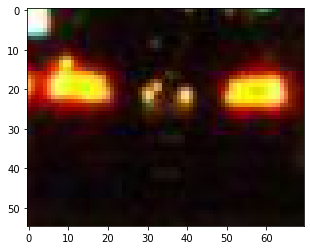

predict_score: [[9.9936098e-01 5.0893013e-06 7.7061213e-07 4.3788019e-05 7.8612447e-07
  5.8857369e-04]]
classes: ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
max_pred_label:  Car


(0, 0.999361)

In [2]:
model = keras.models.load_model(r'D:\work\AI_Edge_Contest\object_detect\classes\trained_results\class_0_5_model_InceptionResNetV2+SE_epoch10_from_02_keras_py\finetuning.h5'
                                , compile=False)

pred_path = r'D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg'
classes = ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
img_rows, img_cols = 331, 331
show_img=True

base_predict.pred_from_1img(model, pred_path, img_rows, img_cols, classes=classes, show_img=show_img)

## base_predict.pred_from_1X
- 1件の前処理済みの画像データから予測実行し、確率最大のラベル表示し、確率最大のid返す

In [4]:
from keras_preprocessing import image
model = keras.models.load_model(r'D:\work\AI_Edge_Contest\object_detect\classes\trained_results\class_0_5_model_InceptionResNetV2+SE_epoch10_from_02_keras_py\finetuning.h5'
                                , compile=False)

pred_path = r'D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg'
classes = ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
img_rows, img_cols = 331, 331
show_img=True

img = image.load_img(pred_path, target_size=(img_rows, img_cols))
X = image.img_to_array(img)/255.0

base_predict.pred_from_1X(model, X, classes=classes)
base_predict.pred_from_1X(model, X)

predict_score: [[9.9936098e-01 5.0892722e-06 7.7060702e-07 4.3787859e-05 7.8611998e-07
  5.8856979e-04]]
classes: ['Car', 'Bicycle', 'Pedestrian', 'Signal', 'Signs', 'Truck']
max_pred_label:  Car
predict_score: [[9.9936098e-01 5.0892722e-06 7.7060702e-07 4.3787859e-05 7.8611998e-07
  5.8856979e-04]]


(0, 0.999361)

## base_predict.predict_tta
- albumentationsで水平反転,回転,切り抜き画像作成してTTA

In [5]:
from keras_preprocessing import image
model = keras.models.load_model(r'D:\work\AI_Edge_Contest\object_detect\classes\trained_results\class_0_5_model_InceptionResNetV2+SE_epoch10_from_02_keras_py\finetuning.h5'
                                , compile=False)

pred_path = r'D:\work\AI_Edge_Contest\object_detect\cropped_img\0\train_00000.jpg_#1.jpg'
img_rows, img_cols = 331, 331

img = image.load_img(pred_path, target_size=(img_rows, img_cols))
x = image.img_to_array(img)
print(x.shape)
pred = base_predict.predict_tta(model, x, TTA_rotate_deg=120, TTA_crop_num=5)
print(pred)

(331, 331, 3)
[8.7716150e-01 2.9383518e-04 4.8791023e-04 1.4743663e-03 2.6847908e-04
 1.2031397e-01]


## base_predict.pred_classes_generator
- 多クラス分類のgenerator からgenerator の指定ディレクトリの画像全件予測する

## base_predict.conf_matrix_from_pred_classes_generator
- pred_classes_generator() でだした値からconf_matrix.make_confusion_matrix() で混同行列作る

my_IDG_options: {'rescale': 0.00392156862745098, 'horizontal_flip': True}
Found 338 images belonging to 11 classes.
y_pred_list_str: ['beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'other'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'other' 'beagle' 'other' 'beagle' 'shingo' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'other' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'shingo' 'beagle'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'boke' 'beagle' 'shingo' 'other' 'other' 'cat' 'cat' 'cat' 'cat'
 'comic_book' 'comic_book' 'comic_book' 'comic_book' 'other' 'marin'
 'comi

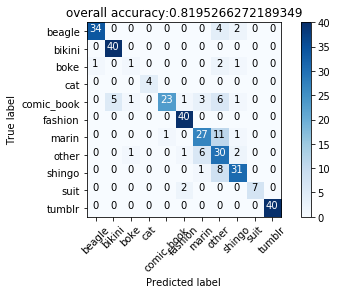

<Figure size 432x288 with 0 Axes>

In [6]:
model = keras.models.load_model(r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122\finetuning.h5'
                                , compile=False)

train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')

img_rows, img_cols, channels = 331, 331, 3
batch_size = 10
classes = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

my_IDG_options={'rescale': 1.0/255.0
                 , 'horizontal_flip': True}

d_cls = get_train_valid_test.LabeledDataset([img_rows, img_cols, channels]
                                            , batch_size
                                            , valid_batch_size=batch_size
                                           )

d_cls.create_my_generator_flow_from_directory(train_data_dir
                                              , classes
                                              , valid_data_dir=validation_data_dir
                                              , color_mode='rgb'
                                              , class_mode='categorical'
                                              , my_IDG_options=my_IDG_options)

pred_df = base_predict.pred_classes_generator(model, d_cls.valid_gen,  steps=(val_samples//batch_size)+1, classes_list=classes)

base_predict.conf_matrix_from_pred_classes_generator(pred_df, classes, output_dir)

## base_predict.predict_tta_generator
- flowやflow_from_directory 済みのImageDataGenerator からTTA を実行

## base_predict.get_predict_generator_results
- 多クラス分類予測結果（スコア）のリスト とgenerator からデータフレームでファイル名と予測ラベル返す

my_IDG_options: {'rescale': 0.00392156862745098, 'horizontal_flip': True}
Found 338 images belonging to 11 classes.
Processing 33:  97%|█████████████████████████████████████████████████████████████████  | 33/34 [01:35<00:02,  2.45s/it]y_pred_list_str: ['beagle' 'beagle' 'beagle' 'beagle' 'other' 'beagle' 'beagle' 'other'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle'
 'beagle' 'beagle' 'other' 'beagle' 'other' 'beagle' 'fashion' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'other' 'beagle' 'beagle'
 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'beagle' 'shingo' 'beagle'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini' 'bikini'
 'boke' 'beagle' 'boke

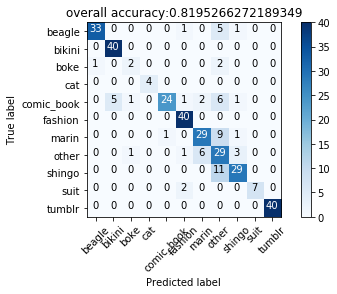

,Filename,PredictionLabel,PredictionScore
0,beagle\Boston_bull_IMG_9631.JPG,beagle,0.916
1,beagle\Brittany_spaniel_IMG_4224.JPG,beagle,0.698
2,beagle\Chihuahua_IMG_4561.JPG,beagle,1.0
3,beagle\Chihuahua_IMG_5361.JPG,beagle,0.995
4,beagle\Chihuahua_IMG_7405.JPG,other,0.667


<Figure size 432x288 with 0 Axes>

In [7]:
model = keras.models.load_model(r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190122\finetuning.h5'
                                , compile=False)

train_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\train'
validation_data_dir = r'D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_400\validation'
val_samples = util.file_count(validation_data_dir, r'.JPG')+util.file_count(validation_data_dir, r'.PNG')+util.file_count(validation_data_dir, r'.jpg')+util.file_count(validation_data_dir, r'.png')

img_rows, img_cols, channels = 331, 331, 3
batch_size = 10
classes = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

my_IDG_options={'rescale': 1.0/255.0
                 , 'horizontal_flip': True}

d_cls = get_train_valid_test.LabeledDataset([img_rows, img_cols, channels]
                                            , batch_size
                                            , valid_batch_size=batch_size
                                           )

d_cls.create_my_generator_flow_from_directory(train_data_dir
                                              , classes
                                              , valid_data_dir=validation_data_dir
                                              , color_mode='rgb'
                                              , class_mode='categorical'
                                              , my_IDG_options=my_IDG_options)

# generatorのnextからTTAする場合
# validation set
# TTA
pred_tta = base_predict.predict_tta_generator(model, d_cls.valid_gen)
pred_tta_df = base_predict.get_predict_generator_results(pred_tta, d_cls.valid_gen, classes_list=classes)

# 出力先ディレクトリ
pred_output_dir = os.path.join(output_dir, 'prediction', 'valid_TTA')
os.makedirs(pred_output_dir, exist_ok=True)

# 予測結果のデータフレームから混同行列作成
base_predict.conf_matrix_from_pred_classes_generator(pred_tta_df, classes, pred_output_dir)

# 予測結果のデータフレーム出力
pred_tta_df.to_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')
pred_tta_df.head()

## base_predict.pred_tta_from_paths
- 指定のファイルパス全件 predict_tta() で予測実行し、ファイルパス、確率最大のラベル名、scoreの予測結果のデータフレームを返す

In [9]:
%%time

output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190310\train_all'
load_model = keras.models.load_model(os.path.join(output_dir, 'finetuning.h5'), compile=False)

img_rows, img_cols, channels=331, 331, 3
classes = ['beagle', 'bikini', 'boke', 'cat', 'comic_book', 'fashion', 'marin', 'other', 'shingo', 'suit', 'tumblr']

# 出力先ディレクトリ
pred_output_dir = os.path.join(output_dir, 'prediction', '2018-08')
os.makedirs(pred_output_dir, exist_ok=True)

data_dir = r'D:\iPhone_pictures\2018-08'
img_paths = util.get_jpg_png_path_in_dir(data_dir)

# 1件づつpredictして、予測結果のデータフレームを返す
pred_df = base_predict.pred_tta_from_paths(load_model, img_paths, img_rows, img_cols, classes=classes, show_img=False
                                           , TTA=''
                                           , TTA_rotate_deg=0
                                           , TTA_crop_num=0, TTA_crop_size=[0, 0]
                                           , preprocess=1.0/255.0)

# 予測結果のデータフレーム出力
pred_df.to_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')
print(pred_df.head())

jpg_png_count: 538

  0%|                                                                                          | 0/538 [00:00<?, ?it/s]
Processing D:/iPhone_pictures/2018-08/IMG_0235.JPG:   0%|                                      | 0/538 [00:00<?, ?it/s]
Processing D:/iPhone_pictures/2018-08/IMG_0235.JPG:   0%|                            | 1/538 [00:07<1:04:49,  7.24s/it]
Processing D:/iPhone_pictures/2018-08/IMG_0457.PNG:   0%|                            | 1/538 [00:07<1:04:49,  7.24s/it]
Processing D:/iPhone_pictures/2018-08/IMG_0457.PNG:   0%|                              | 2/538 [00:07<45:37,  5.11s/it]
Processing D:/iPhone_pictures/2018-08/IMG_2239.PNG:   0%|                              | 2/538 [00:07<45:37,  5.11s/it]
Processing D:/iPhone_pictures/2018-08/IMG_2239.PNG:   1%|▏                             | 3/538 [00:07<32:15,  3.62s/it]
Processing D:/iPhone_pictures/2018-08/IMG_2937.JPG:   1%|▏                             | 3/538 [00:07<32:15,  3.62s/it]
Processing D:/iPhone

Processing D:/iPhone_pictures/2018-08/IMG_6599.JPG:   6%|█▊                           | 33/538 [00:11<01:08,  7.40it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6600.JPG:   6%|█▊                           | 33/538 [00:11<01:08,  7.40it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6600.JPG:   6%|█▊                           | 34/538 [00:11<01:06,  7.62it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6601.PNG:   6%|█▊                           | 34/538 [00:11<01:06,  7.62it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6601.PNG:   7%|█▉                           | 35/538 [00:11<01:09,  7.26it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6602.PNG:   7%|█▉                           | 35/538 [00:11<01:09,  7.26it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6602.PNG:   7%|█▉                           | 36/538 [00:12<01:07,  7.46it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6603.PNG:   7%|█▉                           | 36/538 [00:12<01:07,  7.46it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6632.JPG:  12%|███▌                         | 66/538 [00:16<01:04,  7.30it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6633.PNG:  12%|███▌                         | 66/538 [00:16<01:04,  7.30it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6633.PNG:  12%|███▌                         | 67/538 [00:16<01:04,  7.30it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6634.PNG:  12%|███▌                         | 67/538 [00:16<01:04,  7.30it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6634.PNG:  13%|███▋                         | 68/538 [00:16<01:02,  7.50it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6635.PNG:  13%|███▋                         | 68/538 [00:16<01:02,  7.50it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6635.PNG:  13%|███▋                         | 69/538 [00:16<01:01,  7.62it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6636.PNG:  13%|███▋                         | 69/538 [00:16<01:01,  7.62it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6666.PNG:  18%|█████▎                       | 99/538 [00:21<01:14,  5.87it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6667.PNG:  18%|█████▎                       | 99/538 [00:21<01:14,  5.87it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6667.PNG:  19%|█████▏                      | 100/538 [00:21<01:10,  6.18it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6668.JPG:  19%|█████▏                      | 100/538 [00:21<01:10,  6.18it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6668.JPG:  19%|█████▎                      | 101/538 [00:21<01:06,  6.53it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6669.PNG:  19%|█████▎                      | 101/538 [00:21<01:06,  6.53it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6669.PNG:  19%|█████▎                      | 102/538 [00:21<01:07,  6.50it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6670.PNG:  19%|█████▎                      | 102/538 [00:21<01:07,  6.50it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6704.JPG:  25%|██████▊                     | 132/538 [00:26<00:54,  7.47it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6705.JPG:  25%|██████▊                     | 132/538 [00:26<00:54,  7.47it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6705.JPG:  25%|██████▉                     | 133/538 [00:26<00:52,  7.67it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6706.JPG:  25%|██████▉                     | 133/538 [00:26<00:52,  7.67it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6706.JPG:  25%|██████▉                     | 134/538 [00:26<00:50,  7.99it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6707.JPG:  25%|██████▉                     | 134/538 [00:26<00:50,  7.99it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6707.JPG:  25%|███████                     | 135/538 [00:26<00:48,  8.23it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6708.PNG:  25%|███████                     | 135/538 [00:26<00:48,  8.23it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6737.JPG:  31%|████████▌                   | 165/538 [00:33<01:43,  3.61it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6738.JPG:  31%|████████▌                   | 165/538 [00:33<01:43,  3.61it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6738.JPG:  31%|████████▋                   | 166/538 [00:34<01:47,  3.46it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6739.JPG:  31%|████████▋                   | 166/538 [00:34<01:47,  3.46it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6739.JPG:  31%|████████▋                   | 167/538 [00:34<01:46,  3.48it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6740.JPG:  31%|████████▋                   | 167/538 [00:34<01:46,  3.48it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6740.JPG:  31%|████████▋                   | 168/538 [00:34<01:44,  3.53it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6741.JPG:  31%|████████▋                   | 168/538 [00:34<01:44,  3.53it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6770.JPG:  37%|██████████▎                 | 198/538 [00:42<01:26,  3.92it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6771.JPG:  37%|██████████▎                 | 198/538 [00:42<01:26,  3.92it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6771.JPG:  37%|██████████▎                 | 199/538 [00:43<01:28,  3.85it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6772.PNG:  37%|██████████▎                 | 199/538 [00:43<01:28,  3.85it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6772.PNG:  37%|██████████▍                 | 200/538 [00:43<01:15,  4.48it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6773.PNG:  37%|██████████▍                 | 200/538 [00:43<01:15,  4.48it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6773.PNG:  37%|██████████▍                 | 201/538 [00:43<01:06,  5.06it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6774.PNG:  37%|██████████▍                 | 201/538 [00:43<01:06,  5.06it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6803.JPG:  43%|████████████                | 231/538 [00:51<01:33,  3.27it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6804.JPG:  43%|████████████                | 231/538 [00:51<01:33,  3.27it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6804.JPG:  43%|████████████                | 232/538 [00:51<01:31,  3.36it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6805.JPG:  43%|████████████                | 232/538 [00:51<01:31,  3.36it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6805.JPG:  43%|████████████▏               | 233/538 [00:52<01:26,  3.51it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6806.JPG:  43%|████████████▏               | 233/538 [00:52<01:26,  3.51it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6806.JPG:  43%|████████████▏               | 234/538 [00:52<01:26,  3.51it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6807.JPG:  43%|████████████▏               | 234/538 [00:52<01:26,  3.51it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6836.JPG:  49%|█████████████▋              | 264/538 [01:00<01:15,  3.65it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6837.JPG:  49%|█████████████▋              | 264/538 [01:00<01:15,  3.65it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6837.JPG:  49%|█████████████▊              | 265/538 [01:01<01:15,  3.64it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6838.JPG:  49%|█████████████▊              | 265/538 [01:01<01:15,  3.64it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6838.JPG:  49%|█████████████▊              | 266/538 [01:01<01:17,  3.53it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6839.JPG:  49%|█████████████▊              | 266/538 [01:01<01:17,  3.53it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6839.JPG:  50%|█████████████▉              | 267/538 [01:01<01:16,  3.53it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6840.JPG:  50%|█████████████▉              | 267/538 [01:01<01:16,  3.53it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6872.JPG:  55%|███████████████▍            | 297/538 [01:09<00:37,  6.44it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6873.JPG:  55%|███████████████▍            | 297/538 [01:09<00:37,  6.44it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6873.JPG:  55%|███████████████▌            | 298/538 [01:09<00:35,  6.69it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6874.JPG:  55%|███████████████▌            | 298/538 [01:09<00:35,  6.69it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6874.JPG:  56%|███████████████▌            | 299/538 [01:09<00:34,  6.96it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6875.JPG:  56%|███████████████▌            | 299/538 [01:09<00:34,  6.96it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6875.JPG:  56%|███████████████▌            | 300/538 [01:09<00:33,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6876.JPG:  56%|███████████████▌            | 300/538 [01:09<00:33,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6906.JPG:  61%|█████████████████▏          | 330/538 [01:13<00:27,  7.43it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6907.JPG:  61%|█████████████████▏          | 330/538 [01:13<00:27,  7.43it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6907.JPG:  62%|█████████████████▏          | 331/538 [01:14<00:28,  7.34it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6908.JPG:  62%|█████████████████▏          | 331/538 [01:14<00:28,  7.34it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6908.JPG:  62%|█████████████████▎          | 332/538 [01:14<00:27,  7.49it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6909.JPG:  62%|█████████████████▎          | 332/538 [01:14<00:27,  7.49it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6909.JPG:  62%|█████████████████▎          | 333/538 [01:14<00:28,  7.24it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6910.JPG:  62%|█████████████████▎          | 333/538 [01:14<00:28,  7.24it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6939.JPG:  67%|██████████████████▉         | 363/538 [01:18<00:23,  7.58it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6940.JPG:  67%|██████████████████▉         | 363/538 [01:18<00:23,  7.58it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6940.JPG:  68%|██████████████████▉         | 364/538 [01:18<00:23,  7.26it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6941.JPG:  68%|██████████████████▉         | 364/538 [01:18<00:23,  7.26it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6941.JPG:  68%|██████████████████▉         | 365/538 [01:18<00:23,  7.37it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6942.JPG:  68%|██████████████████▉         | 365/538 [01:18<00:23,  7.37it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6942.JPG:  68%|███████████████████         | 366/538 [01:18<00:22,  7.55it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6943.JPG:  68%|███████████████████         | 366/538 [01:18<00:22,  7.55it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_6972.JPG:  74%|████████████████████▌       | 396/538 [01:23<00:20,  6.97it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6973.JPG:  74%|████████████████████▌       | 396/538 [01:23<00:20,  6.97it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6973.JPG:  74%|████████████████████▋       | 397/538 [01:23<00:19,  7.07it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6974.JPG:  74%|████████████████████▋       | 397/538 [01:23<00:19,  7.07it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6974.JPG:  74%|████████████████████▋       | 398/538 [01:23<00:19,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6975.JPG:  74%|████████████████████▋       | 398/538 [01:23<00:19,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6975.JPG:  74%|████████████████████▊       | 399/538 [01:23<00:19,  7.14it/s]
Processing D:/iPhone_pictures/2018-08/IMG_6976.JPG:  74%|████████████████████▊       | 399/538 [01:23<00:19,  7.14it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_7007.PNG:  80%|██████████████████████▎     | 429/538 [01:28<00:15,  6.93it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7008.PNG:  80%|██████████████████████▎     | 429/538 [01:28<00:15,  6.93it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7008.PNG:  80%|██████████████████████▍     | 430/538 [01:28<00:15,  6.95it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7009.PNG:  80%|██████████████████████▍     | 430/538 [01:28<00:15,  6.95it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7009.PNG:  80%|██████████████████████▍     | 431/538 [01:28<00:15,  6.78it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7010.PNG:  80%|██████████████████████▍     | 431/538 [01:28<00:15,  6.78it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7010.PNG:  80%|██████████████████████▍     | 432/538 [01:28<00:16,  6.57it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7011.PNG:  80%|██████████████████████▍     | 432/538 [01:28<00:16,  6.57it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_7044.JPG:  86%|████████████████████████    | 462/538 [01:33<00:10,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7045.JPG:  86%|████████████████████████    | 462/538 [01:33<00:10,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7045.JPG:  86%|████████████████████████    | 463/538 [01:33<00:10,  7.25it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7046.JPG:  86%|████████████████████████    | 463/538 [01:33<00:10,  7.25it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7046.JPG:  86%|████████████████████████▏   | 464/538 [01:33<00:09,  7.41it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7048.JPG:  86%|████████████████████████▏   | 464/538 [01:33<00:09,  7.41it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7048.JPG:  86%|████████████████████████▏   | 465/538 [01:33<00:09,  7.81it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7049.JPG:  86%|████████████████████████▏   | 465/538 [01:33<00:09,  7.81it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_7079.JPG:  92%|█████████████████████████▊  | 495/538 [01:38<00:05,  7.69it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7080.PNG:  92%|█████████████████████████▊  | 495/538 [01:38<00:05,  7.69it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7080.PNG:  92%|█████████████████████████▊  | 496/538 [01:38<00:05,  7.40it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7082.JPG:  92%|█████████████████████████▊  | 496/538 [01:38<00:05,  7.40it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7082.JPG:  92%|█████████████████████████▊  | 497/538 [01:38<00:05,  7.64it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7084.JPG:  92%|█████████████████████████▊  | 497/538 [01:38<00:05,  7.64it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7084.JPG:  93%|█████████████████████████▉  | 498/538 [01:38<00:05,  7.93it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7085.JPG:  93%|█████████████████████████▉  | 498/538 [01:38<00:05,  7.93it/s]
Processing D:/iPhone_pictures/2018-08/IM

Processing D:/iPhone_pictures/2018-08/IMG_7119.PNG:  98%|███████████████████████████▍| 528/538 [01:42<00:01,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7120.PNG:  98%|███████████████████████████▍| 528/538 [01:42<00:01,  7.12it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7120.PNG:  98%|███████████████████████████▌| 529/538 [01:42<00:01,  6.95it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7121.PNG:  98%|███████████████████████████▌| 529/538 [01:42<00:01,  6.95it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7121.PNG:  99%|███████████████████████████▌| 530/538 [01:42<00:01,  6.72it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7122.PNG:  99%|███████████████████████████▌| 530/538 [01:42<00:01,  6.72it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7122.PNG:  99%|███████████████████████████▋| 531/538 [01:42<00:01,  6.94it/s]
Processing D:/iPhone_pictures/2018-08/IMG_7123.JPG:  99%|███████████████████████████▋| 531/538 [01:42<00:01,  6.94it/s]
Processing D:/iPhone_pictures/2018-08/IM

## base_predict.copy_pred_img_by_pred_df
- 予測結果のデータフレームから、予測ラベルごとに出力先ディレクトリを分けて、予測した画像コピーする

In [10]:
output_dir = r'D:\work\keras_iPhone_pictures\01_classes_results_tfgpu_py36\20190310\train_all'

# 予測結果のデータフレーム
pred_output_dir = os.path.join(output_dir, 'prediction', '2018-08')
pred_df = pd.read_csv(os.path.join(pred_output_dir, 'pred.tsv'), sep='\t')

# 出力先ディレクトリ
pred_img_output_dir = os.path.join(output_dir, 'prediction_cp_img', '2018-08')
os.makedirs(pred_output_dir, exist_ok=True)

# 予測ラベルごとに出力先ディレクトリを分けて、予測した画像コピー
base_predict.copy_pred_img_by_pred_df(pred_img_output_dir, pred_df)


0it [00:00, ?it/s]
2it [00:00, 19.85it/s]
5it [00:00, 21.10it/s]
18it [00:00, 28.11it/s]
28it [00:00, 35.82it/s]
44it [00:00, 46.04it/s]
58it [00:00, 57.62it/s]
98it [00:00, 77.39it/s]
137it [00:00, 101.81it/s]
162it [00:01, 110.34it/s]
184it [00:01, 125.95it/s]
205it [00:01, 101.28it/s]
222it [00:05, 14.14it/s] 
234it [00:05, 18.08it/s]
244it [00:05, 21.12it/s]
252it [00:05, 24.85it/s]
259it [00:06, 16.86it/s]
265it [00:06, 18.50it/s]
270it [00:06, 20.74it/s]
275it [00:07, 24.40it/s]
279it [00:07, 27.20it/s]
283it [00:08, 10.34it/s]
287it [00:08, 12.90it/s]
290it [00:08, 13.86it/s]
339it [00:08, 19.57it/s]
363it [00:08, 26.35it/s]
379it [00:08, 32.25it/s]
392it [00:09, 24.24it/s]
402it [00:10, 24.16it/s]
410it [00:10, 20.39it/s]
416it [00:12,  9.69it/s]
421it [00:12, 12.56it/s]
430it [00:12, 16.86it/s]
436it [00:12, 18.79it/s]
441it [00:12, 19.53it/s]
449it [00:13, 20.60it/s]
453it [00:13, 20.46it/s]
464it [00:13, 26.38it/s]
473it [00:13, 32.74it/s]
479it [00:14, 21.35it/s]
538it [00

## get_metrics_from_score_dir
- 予測結果ディレクトリのtsvファイルからラベルの数と2値分類の評価指標(accやroc_aucなど)を計算する

In [5]:
_dir = r'C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\output_test\100x100\predict\sample_data\score'

df_count_concat = base_predict.get_metrics_from_score_dir(_dir, mask_value=None)
df_count_concat

INFO: save file. [C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\output_test\100x100\predict\sample_data\score\metrics.csv] (5, 12)


,tsv,accuracy,precision,recall,specificity,f1,roc_auc,pr_auc,mcc,logloss,0,1
0,task0.tsv,0.880,0.737,0.667,0.937,0.700,0.895,0.770,0.626,4.145,316,84
1,task1.tsv,0.858,0.865,0.474,0.977,0.612,0.899,0.786,0.570,4.922,305,95
2,task2.tsv,0.775,1.000,0.126,1.000,0.224,0.895,0.765,0.311,7.771,297,103
3,task3.tsv,0.928,0.939,0.713,0.987,0.810,0.973,0.906,0.778,2.504,313,87
4,task4.tsv,0.850,0.923,0.571,0.978,0.706,0.890,0.865,0.644,5.181,274,126
